In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# Word frequency analysis
from collections import Counter
from wordcloud import WordCloud

In [3]:
# Load the dataset
preguntas = pd.read_csv("preguntas.csv")

# Show first rows
preguntas.head()

preguntas.describe()


,numero_pregunta
count,17.000000
mean,9.000000
std,5.049752
min,1.000000
25%,5.000000
50%,9.000000
75%,13.000000
max,17.000000


In [4]:
# Load the dataset
respuestas = pd.read_csv("respuestas.csv")

# Show first rows
respuestas.head()

respuestas.describe()

# Count of categorical responses
respuestas['Pregunta_1'].value_counts()

Pregunta_1
9/17/2025 20:35:23    1
9/17/2025 20:36:47    1
9/17/2025 20:38:39    1
9/17/2025 20:41:25    1
9/17/2025 20:44:58    1
                     ..
9/19/2025 6:32:25     1
9/20/2025 7:40:32     1
9/20/2025 9:16:27     1
9/20/2025 12:11:36    1
9/21/2025 21:30:49    1
Name: count, Length: 80, dtype: int64

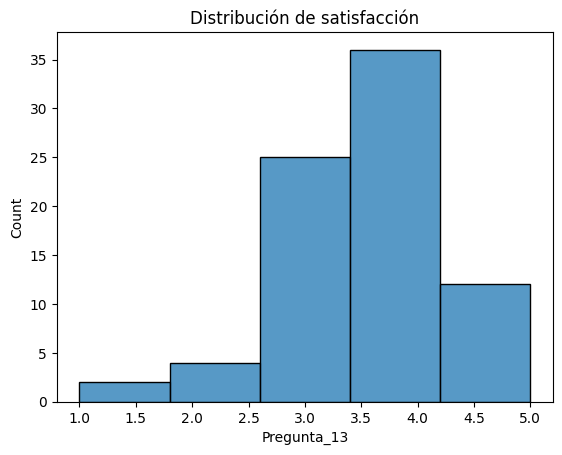

In [5]:
# Histogram of satisfaction ratings
respuestas['Pregunta_13']
sns.histplot(respuestas['Pregunta_13'], bins=5, kde=False)
plt.title("Distribución de satisfacción")
plt.show()

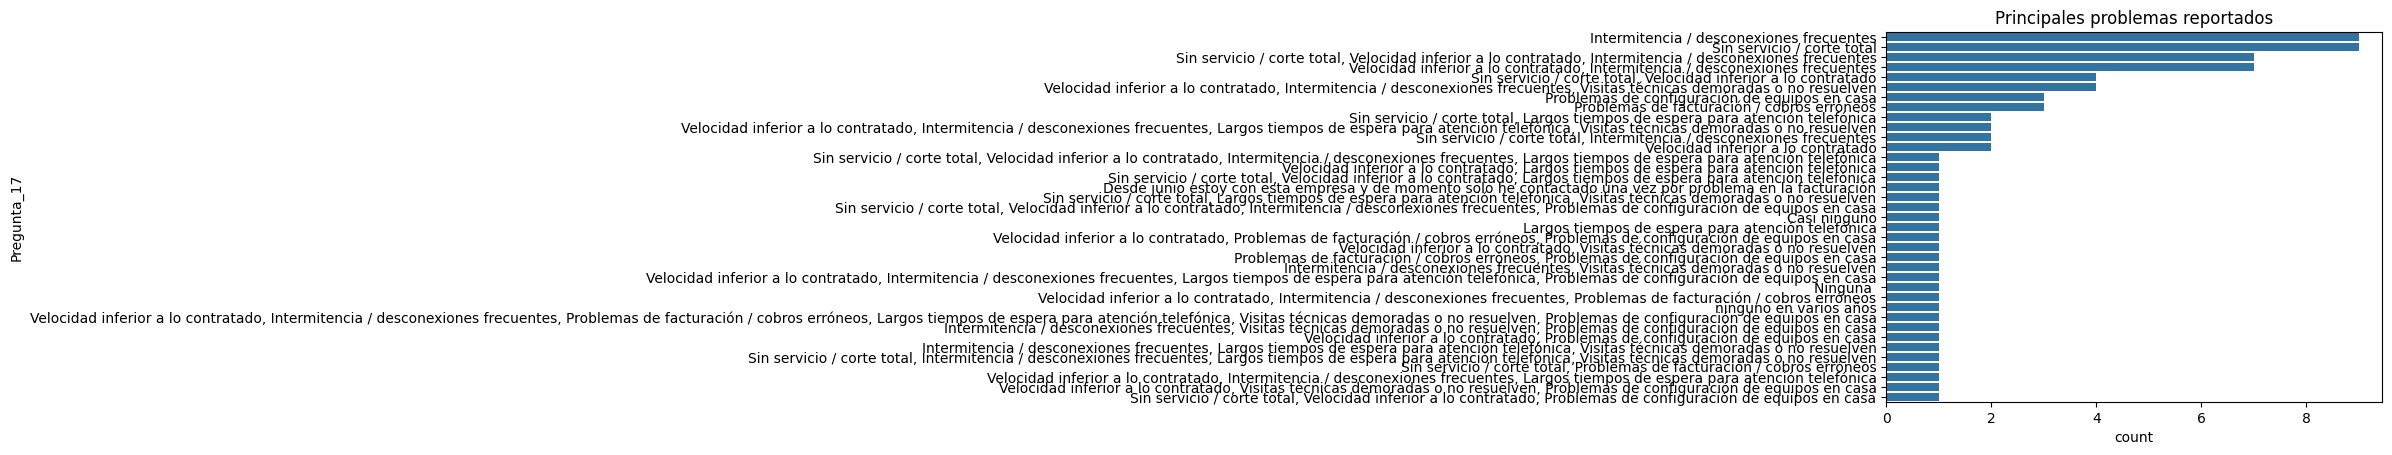

In [6]:
# Bar plot of most common problems reported
sns.countplot(y="Pregunta_17", data=respuestas, order=respuestas['Pregunta_17'].value_counts().index)
plt.title("Principales problemas reportados")
plt.show()

In [7]:
satisfaction = respuestas['Pregunta_13'].dropna()

mean = satisfaction.mean()
confidence_interval = st.t.interval(
    0.95, len(satisfaction)-1, loc=mean, scale=st.sem(satisfaction)
)

print("Promedio satisfacción:", mean)
print("95% intervalo de confianza:", confidence_interval)

Promedio satisfacción: 3.6582278481012658
95% intervalo de confianza: (np.float64(3.4588975031112854), np.float64(3.857558193091246))


[('el', 50), ('de', 40), ('que', 37), ('y', 33), ('a', 26), ('se', 24), ('la', 23), ('un', 19), ('al', 17), ('en', 15), ('me', 15), ('problema', 14), ('no', 13), ('para', 13), ('por', 12), ('del', 10), ('servicio', 10), ('técnico', 10), ('Se', 9), ('visita', 9)]


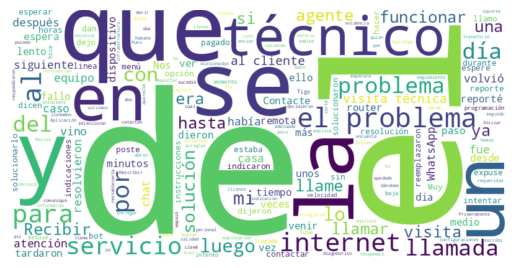

In [8]:
all_text = " ".join(respuestas['Pregunta_16'].dropna().astype(str))
words = all_text.split()

counter = Counter(words)
print(counter.most_common(20))

wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter

# Lista de stopwords en español
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:

def crear_nube_palabras(columna):
    # Concatenar todos los comentarios
    all_text = " ".join(columna.dropna().astype(str))

    # Separar en palabras y filtrar
    words = [w.lower() for w in all_text.split() if w.lower() not in stop_words]

    # Contar palabras más frecuentes
    counter = Counter(words)
    print(counter.most_common(20))

    wc = WordCloud(
        width=800, 
        height=400, 
        background_color="white",
        stopwords=stop_words
    ).generate(" ".join(words))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()


[('problema', 15), ('internet', 11), ('servicio', 10), ('técnico', 10), ('visita', 9), ('-', 7), ('problema,', 7), ('luego', 7), ('solución', 6), ('técnica', 6), ('si', 5), ('recibir', 5), ('día', 5), ('llamada', 5), ('chat', 4), ('atención', 4), ('caso', 4), ('cliente,', 4), ('siguiente', 4), ('volvió', 4)]


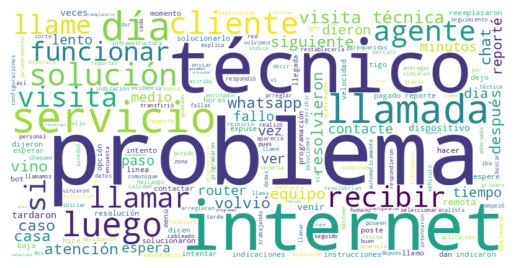

In [11]:
crear_nube_palabras(respuestas['Pregunta_16'])

[('/', 57), ('baja', 26), ('velocidad', 26), ('intermitencia', 26), ('corte', 22), ('servicio', 22), ('internet', 22), ('fallo', 15), ('equipo', 15), ('(router,', 15), ('módem)', 15), ('problema', 14), ('facturación', 7), ('cobro', 7), ('incorrecto', 7), ('línea', 6), ('fija', 4), ('(no', 4), ('tono)', 4), ('datos', 3)]


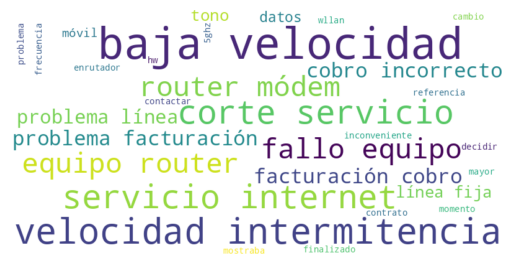

In [12]:
crear_nube_palabras(respuestas['Pregunta_8'])

[('programaron', 34), ('visita', 34), ('técnica', 34), ('(técnico', 34), ('presencial)', 34), ('solución', 30), ('remota', 30), ('resuelta', 30), ('(configuración,', 30), ('reinicio,', 30), ('instrucción)', 30), ('/', 12), ('compensación', 7), ('ajuste', 7), ('factura', 7), ('reemplazo', 5), ('equipo', 5), ('recolección', 5), ('sucursal', 5), ('dijeron', 1)]


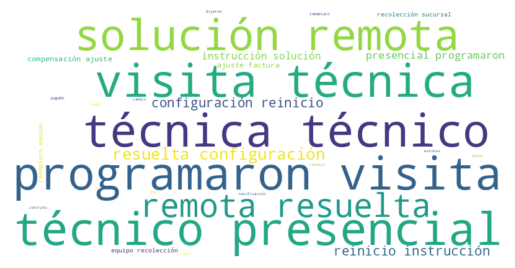

In [13]:
crear_nube_palabras(respuestas['Pregunta_9'])

[('problema', 15), ('internet', 11), ('servicio', 10), ('técnico', 10), ('visita', 9), ('-', 7), ('problema,', 7), ('luego', 7), ('solución', 6), ('técnica', 6), ('si', 5), ('recibir', 5), ('día', 5), ('llamada', 5), ('chat', 4), ('atención', 4), ('caso', 4), ('cliente,', 4), ('siguiente', 4), ('volvió', 4)]


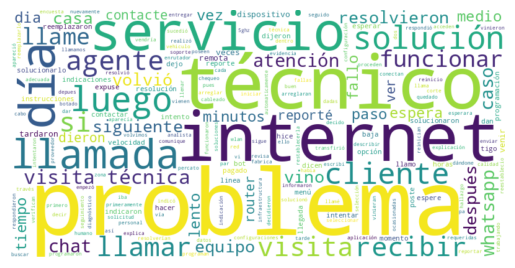

In [14]:
crear_nube_palabras(respuestas['Pregunta_16'])

Combinacion
Internet residencial                                     43
 Telefonía móvil,Internet residencial                    16
 Telefonía fija, Telefonía móvil,Internet residencial    12
 Telefonía fija,Internet residencial                      7
Telefonía móvil                                           2
Name: count, dtype: int64


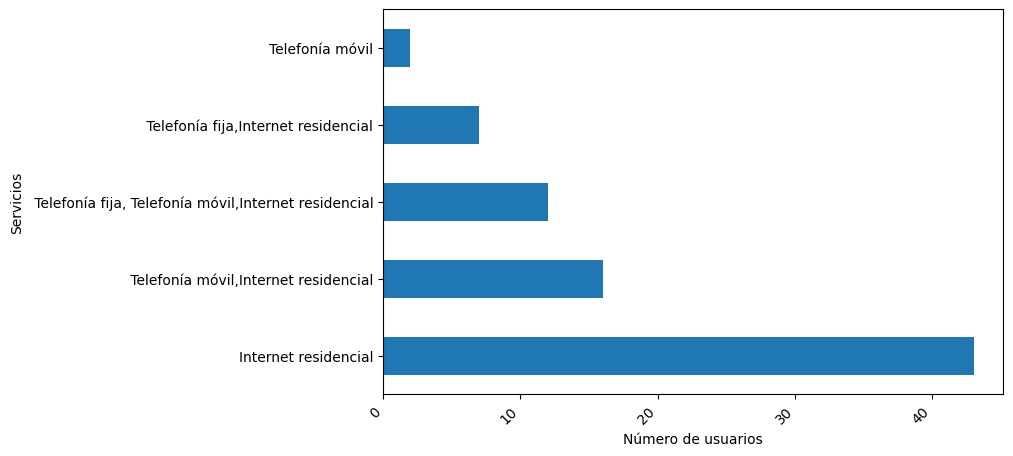

In [15]:
respuestas['Pregunta_4']

# Quitar espacios, separar por coma, ordenar y volver a unir
respuestas["Combinacion"] = (
    respuestas['Pregunta_4']
    # .str.replace(" ", "", regex=False)       # quitar espacios
    .str.split(",")                          # separar en lista
    .apply(lambda x: ",".join(sorted(x)))    # ordenar y volver a unir
)

comb_counts = respuestas["Combinacion"].value_counts()

print(comb_counts)

comb_counts.plot(kind="barh", figsize=(8,5))
# plt.title("Combinaciones de servicios más comunes")
plt.ylabel("Servicios")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()


In [16]:
# Mapeo de rangos a valores numéricos
rangos = {
    "Menos de 1 hora": 1 / 2,
    "1–24 horas": (24 - 1) / 2,
    "1–3 días": (((3 - 1) * 24) / 2) + 24,
    "4-7 días": (((7 - 4) * 24) / 2) + (4 * 24),
    "Más de 7 días": (((15 - 7) * 24) / 2) + (7 * 24), # Máximo 15 días
    "No se ha resuelto": np.nan,  # No los incluimos en promedio
}

respuestas['Pregunta_11']
respuestas['horas_estimadas']=respuestas['Pregunta_11'].map(rangos)
respuestas['horas_estimadas']
# Calcular promedio (ignorando los NaN)
promedio = respuestas['horas_estimadas'].mean()

print("Tiempo promedio estimado de resolución:", promedio, "horas")

# Moda categórica (el rango más frecuente)
moda_categoria = respuestas['Pregunta_11'].mode()[0]

print("Moda categórica:", moda_categoria)

Tiempo promedio estimado de resolución: 30.807142857142857 horas
Moda categórica: 1–24 horas


In [20]:
def normalize_service(s: str) -> str:
    s = s.lower().strip()
    if "ningun" in s:        # Ninguno / Ninguna
        return "Ninguno"
    elif "facturación" in s:
        return "Problemas de facturación / cobros erróneos"
    else:
        return s.title()     # default: capitalize nicely

0            [Intermitencia / Desconexiones Frecuentes]
1     [Sin Servicio / Corte Total, Velocidad Inferio...
2     [Sin Servicio / Corte Total, Largos Tiempos De...
3     [Sin Servicio / Corte Total, Velocidad Inferio...
4     [Sin Servicio / Corte Total, Intermitencia / D...
                            ...                        
75    [Velocidad Inferior A Lo Contratado, Intermite...
76    [Velocidad Inferior A Lo Contratado, Visitas T...
77    [Sin Servicio / Corte Total, Velocidad Inferio...
78           [Intermitencia / Desconexiones Frecuentes]
79    [Velocidad Inferior A Lo Contratado, Intermite...
Name: Pregunta_17_split, Length: 80, dtype: object
                                                   Frecuencia  Porcentaje
Pregunta_17_split                                                        
Intermitencia / Desconexiones Frecuentes                   41       25.15
Velocidad Inferior A Lo Contratado                         39       23.93
Sin Servicio / Corte Total           

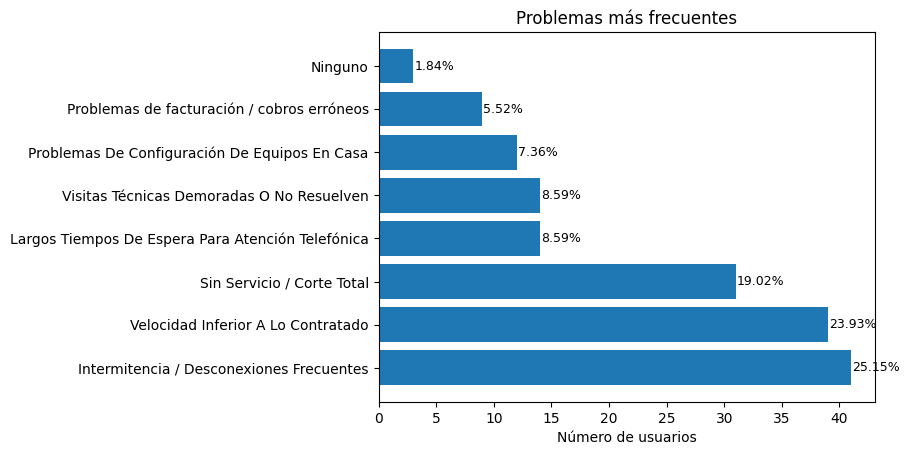

In [ ]:
# Histogram problemas mas frecuentes

# convertir a string, reemplazar None/NaN y dividir
# 2. Normalize 'Ninguno' / 'Ninguna'
respuestas["Pregunta_17_split"] = (
    respuestas["Pregunta_17"]
    .fillna("")
    .astype(str)
    .apply(lambda x: [normalize_service(s) for s in x.split(",") if s.strip() != ""])
)

print(respuestas["Pregunta_17_split"])

# 2. Flatten list of services into one series
all_services = respuestas["Pregunta_17_split"].explode()

# 3. Count frequencies
# counts = all_services.value_counts()

# print("Frequencies:\n", counts)

# 4. Count + percentage
counts = all_services.value_counts()
percentages = counts / counts.sum() * 100

results = pd.DataFrame({"Frecuencia": counts, "Porcentaje": percentages.round(2)})
print(results)

# 5. Horizontal bar chart
plt.barh(results.index, results["Frecuencia"])
for i, (freq, pct) in enumerate(zip(results["Frecuencia"], results["Porcentaje"])):
    plt.text(freq + 0.1, i, f"{pct}%", va="center", fontsize=9)


# 4. Plot histogram
# plt.barh(counts.index, counts.values)
# plt.ylabel("Problema")
plt.xlabel("Número de usuarios")
plt.title("Problemas más frecuentes")
# plt.xticks(rotation=45)
plt.show()

            Pregunta_1 Pregunta_2   Pregunta_3  \
11  9/17/2025 20:50:32      25–34   Zona rural   
33  9/17/2025 21:31:36      25–34  Zona urbana   
39  9/17/2025 22:13:59      25–34  Zona urbana   
52   9/18/2025 5:55:29      25–34  Zona urbana   
61   9/18/2025 9:07:05      18–24  Zona urbana   
62   9/18/2025 9:11:57      55–64  Zona urbana   

                                           Pregunta_4  Pregunta_5  \
11                               Internet residencial      Básico   
33                               Internet residencial  Intermedio   
39  Internet residencial, Telefonía móvil, Telefon...  Intermedio   
52                               Internet residencial  Intermedio   
61  Internet residencial, Telefonía móvil, Telefon...    Avanzado   
62                               Internet residencial      Básico   

                      Pregunta_6             Pregunta_7  \
11        Presencial en sucursal  Menos de 1 vez al año   
33            Llamada telefónica  1 vez cada 4–

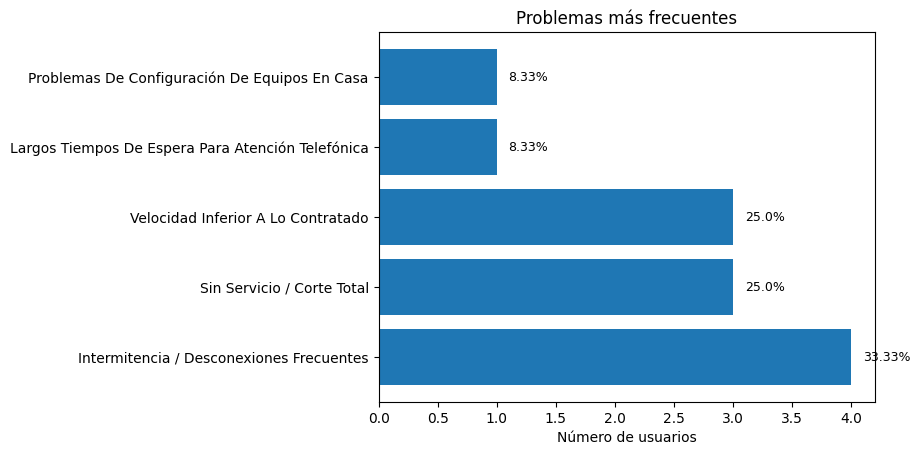

Pregunta_7
1 vez cada 4–12 meses    2
1 vez cada 1–3 meses     2
Menos de 1 vez al año    1
Nunca                    1
Name: count, dtype: int64


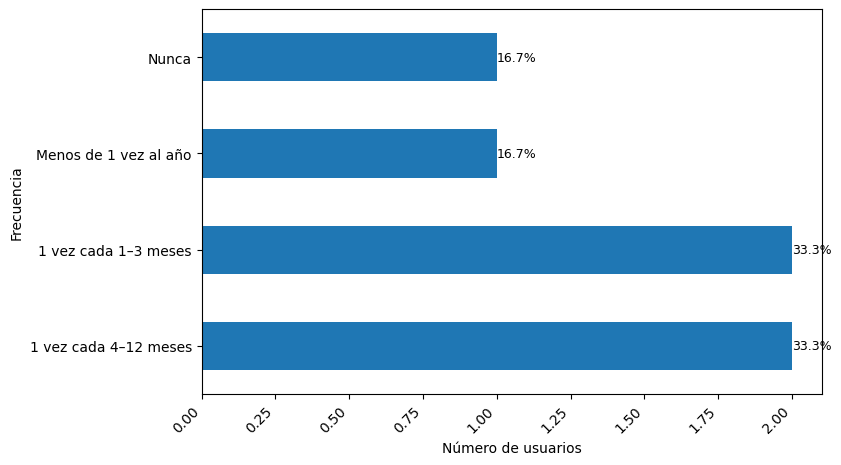

Pregunta_5
Intermedio    3
Básico        2
Avanzado      1
Name: count, dtype: int64


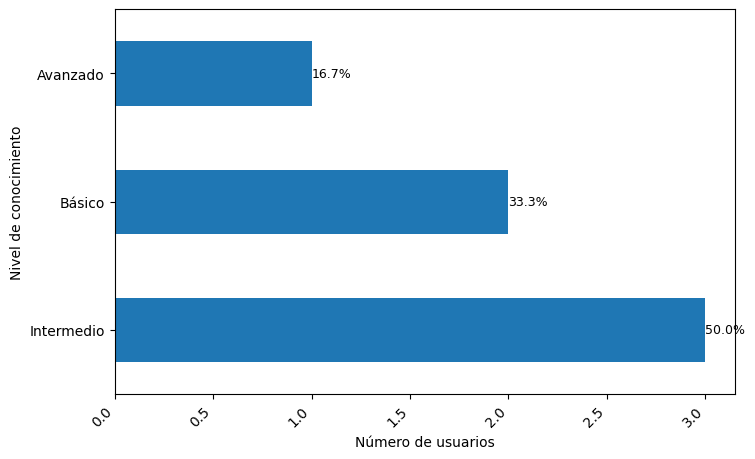

Pregunta_2
25–34    4
18–24    1
55–64    1
Name: count, dtype: int64


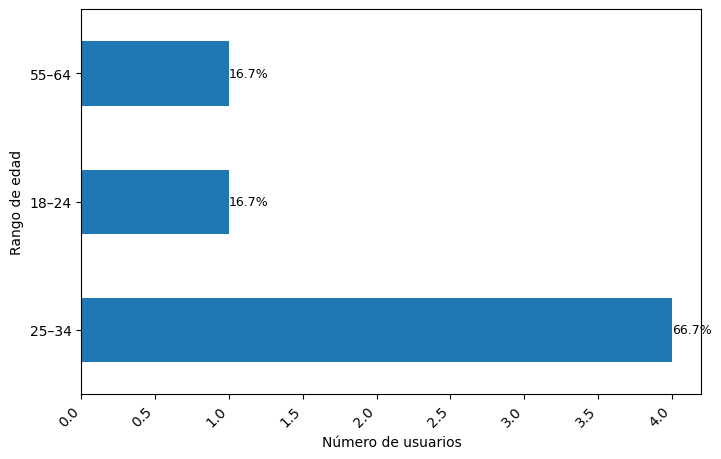

Pregunta_6
Llamada telefónica              4
Presencial en sucursal          1
Mensajería (WhatsApp u otro)    1
Name: count, dtype: int64


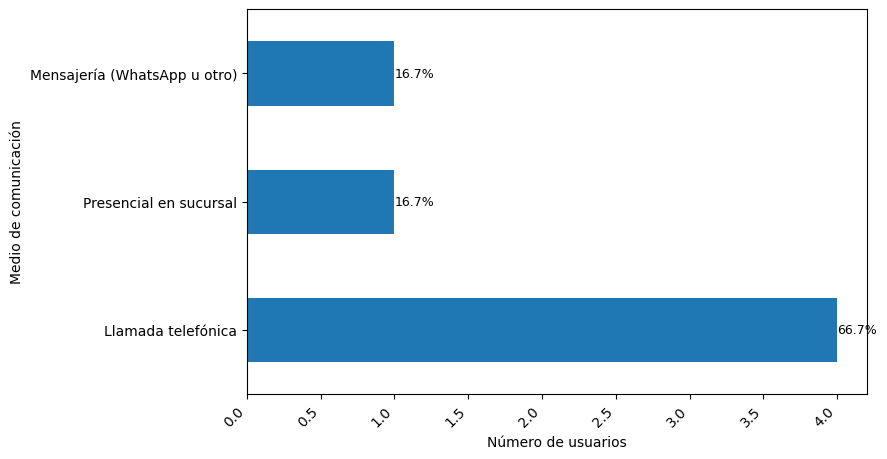

Combinacion
Internet residencial                                     4
 Telefonía fija, Telefonía móvil,Internet residencial    2
Name: count, dtype: int64


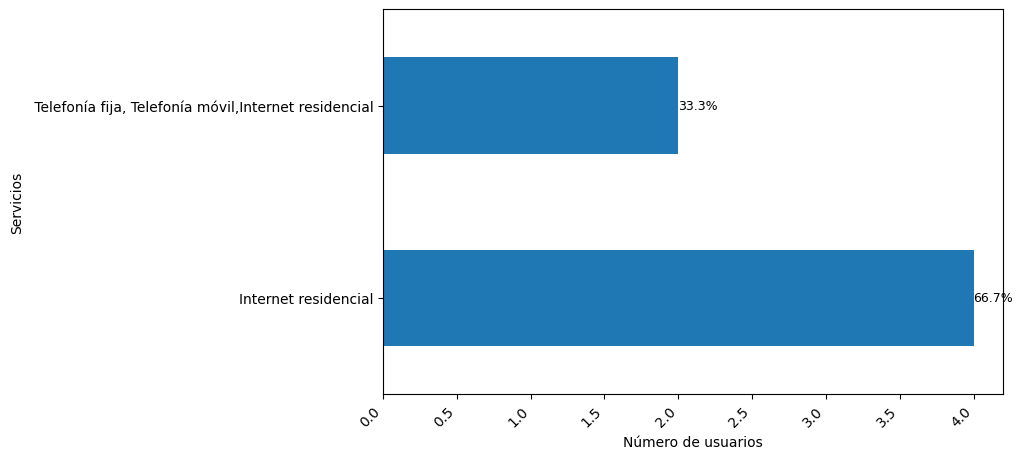

Pregunta_11
Menos de 1 hora    2
1–24 horas         2
4–7 días           1
Más de 7 días      1
Name: count, dtype: int64


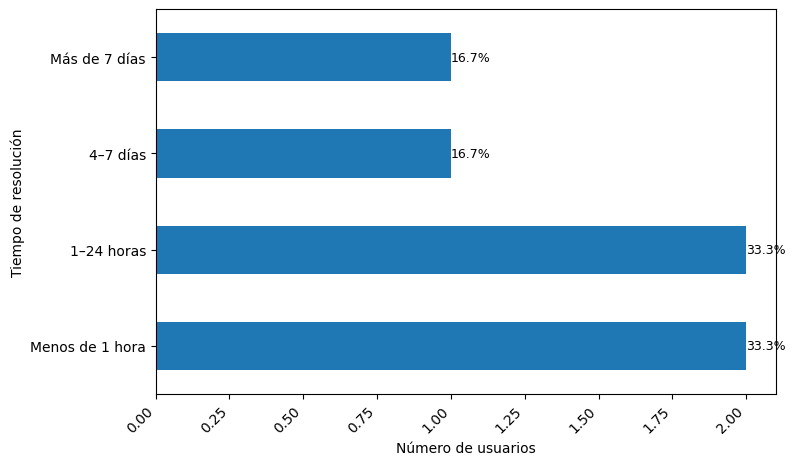

Pregunta_14
Sí, volvería a contactar al servicio de atención al cliente.    5
Depende del costo/urgencia.                                     1
Name: count, dtype: int64


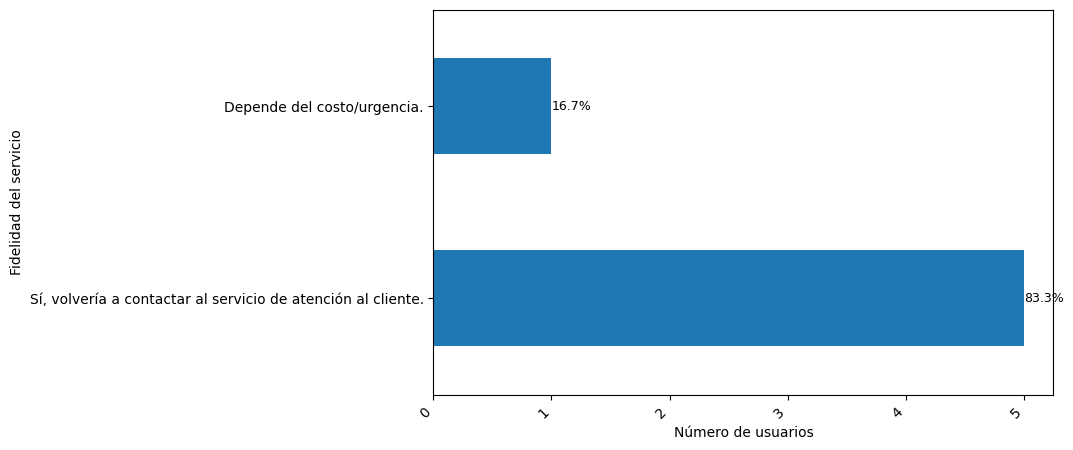

In [57]:
# Histogram problemas mas frecuentes

# 1. Filtrar usuarios con calificación menor a 3
respuestas_filtradas = respuestas[respuestas["Pregunta_13"] < 3].copy()
print(respuestas_filtradas)

# convertir a string, reemplazar None/NaN y dividir
# 2. Normalize 'Ninguno' / 'Ninguna'
respuestas_filtradas["Pregunta_17_split"] = (
    respuestas_filtradas["Pregunta_17"]
    .fillna("")
    .astype(str)
    .apply(lambda x: [normalize_service(s) for s in x.split(",") if s.strip() != ""])
)

print(respuestas_filtradas["Pregunta_17_split"])

# 2. Flatten list of services into one series
all_services = respuestas_filtradas["Pregunta_17_split"].explode()

# 4. Count + percentage
counts = all_services.value_counts()
percentages = counts / counts.sum() * 100

results = pd.DataFrame({"Frecuencia": counts, "Porcentaje": percentages.round(2)})
print(results)

# 5. Horizontal bar chart
plt.barh(results.index, results["Frecuencia"])
for i, (freq, pct) in enumerate(zip(results["Frecuencia"], results["Porcentaje"])):
    plt.text(freq + 0.1, i, f"{pct}%", va="center", fontsize=9)

# 4. Plot histogram
plt.xlabel("Número de usuarios")
plt.title("Problemas más frecuentes")
plt.show()


# Con que frecuencia contactan
comb_counts = respuestas_filtradas["Pregunta_7"].value_counts()
percentages = comb_counts / comb_counts.sum() * 100
print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))

# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)

# plt.title("")
plt.ylabel("Frecuencia")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Que nivel de conocimiento de tecnologico tienen

comb_counts = respuestas_filtradas["Pregunta_5"].value_counts()
percentages = comb_counts / comb_counts.sum() * 100
print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("")
plt.ylabel("Nivel de conocimiento")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Edad

comb_counts = respuestas_filtradas["Pregunta_2"].value_counts()
percentages = comb_counts / comb_counts.sum() * 100

print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("")
plt.ylabel("Rango de edad")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Medio preferido

comb_counts = respuestas_filtradas["Pregunta_6"].value_counts()
percentages = comb_counts / comb_counts.sum() * 100

print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("")
plt.ylabel("Medio de comunicación")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Que servicios poseen
respuestas_filtradas["Pregunta_4"]

# Quitar espacios, separar por coma, ordenar y volver a unir
respuestas_filtradas["Combinacion"] = (
    respuestas_filtradas["Pregunta_4"]
    # .str.replace(" ", "", regex=False)       # quitar espacios
    .str.split(",").apply(  # separar en lista
        lambda x: ",".join(sorted(x))
    )  # ordenar y volver a unir
)

comb_counts = respuestas_filtradas["Combinacion"].value_counts()

percentages = comb_counts / comb_counts.sum() * 100

print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("Combinaciones de servicios más comunes")
plt.ylabel("Servicios")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Tiempo de respuesta
comb_counts = respuestas_filtradas["Pregunta_11"].value_counts()

percentages = comb_counts / comb_counts.sum() * 100

print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("")
plt.ylabel("Tiempo de resolución")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()

# Fidelización

comb_counts = respuestas_filtradas["Pregunta_14"].value_counts()
percentages = comb_counts / comb_counts.sum() * 100

print(comb_counts)

ax = comb_counts.plot(kind="barh", figsize=(8, 5))
# Add percentages as labels
for i, (count, pct) in enumerate(zip(comb_counts, percentages)):
    ax.text(count, i, f"{pct:.1f}%", va="center", fontsize=9)
# plt.title("")
plt.ylabel("Fidelidad del servicio")
plt.xlabel("Número de usuarios")
plt.xticks(rotation=45, ha="right")
plt.show()